# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[89, 88,  5, ..., 56, 75, 51],
       [94, 17, 50, ..., 67, 68, 47],
       [12, 27, 60, ..., 70, 90,  0],
       ...,
       [55, 11, 41, ..., 73, 55, 97],
       [49, 43,  1, ..., 69, 15, 45],
       [30, 35, 21, ..., 53, 87, 68]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [5]:
copy = A.copy().transpose()
np.random.shuffle(copy)
new_A = copy.transpose()
new_A


array([[ 5, 76, 38, ..., 30, 53, 82],
       [50, 30, 36, ...,  8, 68, 15],
       [60, 84, 29, ..., 35, 51, 39],
       ...,
       [41, 16, 67, ..., 93, 12,  8],
       [ 1,  1, 30, ..., 15, 98,  5],
       [21, 44,  8, ..., 20, 21, 80]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [7]:
odd_sum = A[::, 1::2].sum(axis=1)
odd_mean = odd_sum.mean()
even_sum = A[::, ::2].sum(axis=1)
masked = A[even_sum > odd_mean]
masked

array([[89, 88,  5, ..., 56, 75, 51],
       [94, 17, 50, ..., 67, 68, 47],
       [12, 27, 60, ..., 70, 90,  0],
       ...,
       [83, 24, 50, ..., 98, 58, 63],
       [50, 23, 92, ..., 83, 83, 41],
       [30, 35, 21, ..., 53, 87, 68]])

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [9]:
row_min = A.min(axis=1)
row_max = A.max(axis=1)
delta = row_max - row_min
np.argmax(delta)

7

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [10]:
shape = A.shape
serial_number_A = A.reshape(-1).argsort().argsort().reshape(shape)
serial_number_A

array([[8964, 8858,  571, ..., 5640, 7512, 5147],
       [9418, 1710, 5067, ..., 6659, 6813, 4758],
       [1185, 2763, 6041, ..., 7022, 8994,   32],
       ...,
       [5577, 1092, 4207, ..., 7236, 5569, 9787],
       [4929, 4335,  181, ..., 6935, 1477, 4494],
       [3051, 3571, 2113, ..., 5368, 8731, 6791]])

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [74]:
normalized = (A - A.min(axis=1).reshape(-1, 1)) / (A.max(axis=1) - A.min(axis=1)).reshape(-1,1)
normalized


array([[0.90816327, 0.89795918, 0.05102041, ..., 0.57142857, 0.76530612,
        0.52040816],
       [0.9893617 , 0.17021277, 0.5212766 , ..., 0.70212766, 0.71276596,
        0.4893617 ],
       [0.12244898, 0.2755102 , 0.6122449 , ..., 0.71428571, 0.91836735,
        0.        ],
       ...,
       [0.55789474, 0.09473684, 0.41052632, ..., 0.74736842, 0.55789474,
        1.        ],
       [0.5       , 0.43877551, 0.01020408, ..., 0.70408163, 0.15306122,
        0.45918367],
       [0.3030303 , 0.35353535, 0.21212121, ..., 0.53535354, 0.87878788,
        0.68686869]])

In [80]:
np.max(normalized[0])

1.0

In [77]:
np.min(normalized[0])

0.0

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [12]:
shape = A.shape
arr = A.reshape(1, shape[0], shape[1])
second_operands = np.array(range(1,11))
tensor = second_operands.reshape(10, 1, 1) * arr
tensor

array([[[ 89,  88,   5, ...,  56,  75,  51],
        [ 94,  17,  50, ...,  67,  68,  47],
        [ 12,  27,  60, ...,  70,  90,   0],
        ...,
        [ 55,  11,  41, ...,  73,  55,  97],
        [ 49,  43,   1, ...,  69,  15,  45],
        [ 30,  35,  21, ...,  53,  87,  68]],

       [[178, 176,  10, ..., 112, 150, 102],
        [188,  34, 100, ..., 134, 136,  94],
        [ 24,  54, 120, ..., 140, 180,   0],
        ...,
        [110,  22,  82, ..., 146, 110, 194],
        [ 98,  86,   2, ..., 138,  30,  90],
        [ 60,  70,  42, ..., 106, 174, 136]],

       [[267, 264,  15, ..., 168, 225, 153],
        [282,  51, 150, ..., 201, 204, 141],
        [ 36,  81, 180, ..., 210, 270,   0],
        ...,
        [165,  33, 123, ..., 219, 165, 291],
        [147, 129,   3, ..., 207,  45, 135],
        [ 90, 105,  63, ..., 159, 261, 204]],

       ...,

       [[712, 704,  40, ..., 448, 600, 408],
        [752, 136, 400, ..., 536, 544, 376],
        [ 96, 216, 480, ..., 560, 720,   0

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [13]:
odd_columns = A[:, 1::2]
even_columns = A[:, ::2]
concated = np.concatenate([even_columns, odd_columns], axis=1)
concated

array([[89,  5, 80, ..., 41, 56, 51],
       [94, 50, 73, ..., 88, 67, 47],
       [12, 60, 80, ..., 26, 70,  0],
       ...,
       [55, 41, 28, ...,  6, 73, 97],
       [49,  1,  7, ..., 65, 69, 45],
       [30, 21, 38, ..., 19, 53, 68]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [14]:
more_than_5 = np.all(A > 5, axis=1).sum()
more_than_5

11

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который является средним этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [15]:
arr = np.split(A, 10)
arr = np.array(arr)
arr = arr.mean(axis=0)
print(arr.shape)
arr

(20, 50)


array([[72.2, 39.8, 53. , 30.9, 45.8, 65.7, 65. , 40.9, 25.3, 50.6, 39.1,
        40.1, 46.2, 52.1, 54.7, 55.3, 29.8, 57. , 58. , 56.6, 69. , 51.9,
        45.3, 45.6, 69. , 60.1, 57.1, 45.8, 44. , 38.7, 40.9, 65.1, 61.3,
        36.1, 48.1, 52.2, 57.9, 42.2, 39.7, 48. , 31.4, 39.2, 57.3, 46.9,
        60.9, 46.4, 43.8, 28.5, 44.9, 51.2],
       [58.2, 40.5, 47.9, 45.8, 69.8, 40.8, 44.6, 38.3, 36.6, 42.8, 65.3,
        46.3, 51.1, 56.8, 60.5, 53.2, 45.9, 61.9, 38.4, 64.4, 49.7, 61.4,
        55.4, 60.6, 39.8, 47.5, 40.6, 34.6, 49.6, 45.9, 48.9, 40.2, 43.6,
        31. , 47.1, 56.8, 44.2, 42.5, 40.9, 55.7, 50.5, 40. , 39.9, 46.7,
        55.4, 50.2, 48.8, 65.4, 48. , 56.2],
       [49.5, 48.5, 53. , 39.3, 54.4, 46.2, 41.4, 42. , 46.7, 51.6, 34.9,
        48.5, 42.8, 51. , 31.7, 45.6, 55.6, 62.7, 69. , 48.5, 50. , 65.6,
        38.9, 59.9, 58.6, 67.9, 59.6, 49.4, 40.3, 38. , 40.1, 36.9, 28.1,
        51.2, 55.6, 52.1, 57. , 58.6, 47.1, 43.3, 50. , 33.3, 45. , 50.6,
        59.8, 40.6, 64

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [16]:
arr = A.reshape(-1) 
unique_numbers, idx = np.unique(arr, return_index=True)
one_dim_arr = unique_numbers[idx.argsort()]
print(one_dim_arr.shape)
one_dim_arr

(100,)


array([89, 88,  5, 30, 80, 98, 86, 47, 31, 65, 43, 38, 95, 82,  1, 91, 36,
       58, 75, 16, 76, 27, 51, 97, 85, 66, 22, 39,  0, 45, 48, 90, 34, 63,
       53, 44, 23, 21, 19,  9, 41, 49, 56, 94, 17, 50,  8, 73, 25, 79, 26,
       78, 32, 61, 28, 81,  3, 52, 71, 87, 77, 33, 46, 67, 68, 15, 59, 12,
       60, 35, 96, 62, 29, 83, 54, 84, 37, 40, 69, 70, 55, 20,  4,  2, 74,
       64, 11, 10, 57, 72, 99, 18, 93, 24, 42, 14,  6, 92,  7, 13])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [17]:
mean = np.mean(A, axis=0)
arr = np.linalg.norm(A - mean, axis=1)
print(arr.shape)
arr

(200,)


array([197.47608178, 188.16722051, 188.17742392, 201.25641077,
       198.67841573, 198.00339107, 220.27544774, 213.10017099,
       174.67811218, 206.87059452, 185.2430913 , 192.56030971,
       185.23626231, 217.61448223, 201.83285876, 202.08672117,
       201.05042371, 205.56729525, 184.87196346, 187.32990385,
       186.0490604 , 201.83640126, 198.87868884, 204.3365187 ,
       209.47938532, 216.17061057, 215.22333255, 221.58527224,
       195.65475429, 207.61662476, 198.28782836, 179.80879532,
       184.51740534, 193.81184916, 224.18468475, 205.40898928,
       190.49357699, 215.52051613, 210.37930715, 231.70300575,
       194.01328015, 199.73595789, 190.48087273, 203.03884573,
       214.0771657 , 206.23545494, 213.79256974, 205.20346702,
       198.62377218, 222.67465701, 209.82488621, 205.26831922,
       213.99647865, 190.95921783, 198.46982863, 217.13775092,
       199.0995803 , 184.8841066 , 216.95493282, 190.66841079,
       222.78600242, 195.81665628, 219.33294982, 206.84

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [18]:
arr = np.where(A < 50, A, A*3)
arr = np.where(A >= 50, arr, arr*2)
arr

array([[267, 264,  10, ..., 168, 225, 153],
       [282,  34, 150, ..., 201, 204,  94],
       [ 24,  54, 180, ..., 210, 270,   0],
       ...,
       [165,  22,  82, ..., 219, 165, 291],
       [ 98,  86,   2, ..., 207,  30,  90],
       [ 60,  70,  42, ..., 159, 261, 204]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [20]:
def moving_average(arr, window = 3):
    ret = np.cumsum(arr, dtype=float)
    ret[window:] = ret[window:] - ret[:-window]
    return ret[window - 1:] / window

ma_3 = moving_average(A.reshape(-1), 3)
ma_5 = moving_average(A.reshape(-1), 5)
ma_10 = moving_average(A.reshape(-1), 10)

ma_5 = np.concatenate((ma_5, np.zeros(2)))
ma_10 = np.concatenate((ma_10, np.zeros(7)))
ma_3 + ma_5 + ma_10


array([180.96666667, 158.5       , 150.43333333, ...,  79.        ,
        52.66666667,  69.33333333])

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

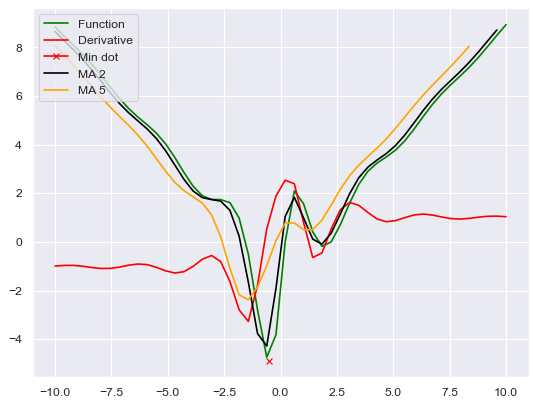

In [97]:
from scipy.misc import derivative
from scipy.optimize import minimize

from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
NUM_OF_POINTS = 50

def f(x):
    return (5*np.sin(2*x) - np.cos(x)**2 - 1 + np.abs(x**3) - x**2) / (x**2 + 1)

minimize_info =  minimize(f, x0=-1)
x_min, y_min = minimize_info['x'][0], minimize_info['fun']

x = np.linspace(-10, 10, NUM_OF_POINTS)
y = f(x)
plt.plot(x, y, color='green', label='Function')
plt.plot(x, derivative(f,x), color='red', label='Derivative')
plt.plot(x_min, y_min, color="red", marker="x", label="Min dot")

plt.plot(x[:-1], moving_average(y, 2), color="black", label='MA 2')
plt.plot(x[:-4], moving_average(y, 5), color="orange", label='MA 5')


plt.legend(loc='upper left')
plt.grid(True)

# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [29]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)   

[3, 4, 0, 0, 0]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [30]:
import numpy.typing as npt

In [81]:
def np_sample(x: npt.NDArray[np.int64], c: int) -> npt.NDArray[np.int64]:
    """Numpy-based sampling (without loops).

    Args:
        x (npt.NDArray[int]): vector of integers
        c (int): desired number of samples

    Returns:
        npt.NDArray[int]: selected indexes from input 
    """
    assert len(x) > 0, "Attention, vector length must be > 0"

    random_values = np.random.rand(c) * x.sum()
    random_values = random_values.reshape(-1, 1)
    
    cumsums = np.cumsum(x).reshape(1, -1)
    cumsums = np.repeat(cumsums, c, axis=0)

    mask = cumsums < random_values
    return mask.sum(axis=1)


np_sample(np.array([50, 3, 1, 7, 20]), 5)

array([3, 0, 0, 0, 0])

In [45]:
arr = np.random.randint(0, 100, size=(1000, ))
c = 150


In [46]:
s1 = sample(arr, c)
s2 = np_sample(arr, c)

v1 = arr[s1]
v2 = arr[s2]

Чтобы убедится в равнозначности алгоритмов, проведем стат тест c уровнем значимости $\alpha = 0.05$. Для сравнение двух дискретных распределения большого размера подойдет ttest_ind

In [47]:
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(s1, s2)
print(f"t-test: statistic={stat:.4f}, p-value={p_value:.4f}")

t-test: statistic=0.0012, p-value=0.9990


Наше p-значение составляет 0.9990, поэтому не отвергаем нулевую гипотезу об отсутствии различий в средних значениях в обеих группах.

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [52]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

1701

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 

In [82]:
def np_walk(n: int, a=[-3, -1, 0, 2, 3]):
    return np.random.choice(a, size=n).sum()

In [34]:
%%timeit
walk(10_000)

2.88 ms ± 67.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [35]:
%%timeit
np_walk(10_000)

121 µs ± 1.16 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [56]:
from seaborn import kdeplot

<AxesSubplot: ylabel='Density'>

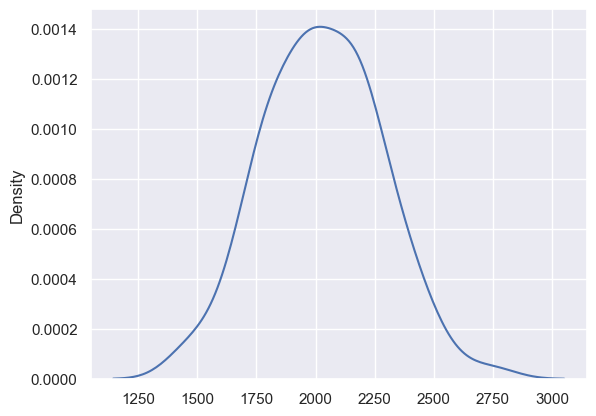

In [65]:
launches = [np_walk(10_000) for _ in range(100)]
kdeplot(launches)

# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [66]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)


1.1620733638943925

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

In [67]:
%%timeit
strange_conv(a)

6.85 s ± 39.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [68]:
from numba import jit

In [69]:
strange_conv_numba = jit(nopython=True)(strange_conv)

In [70]:
%%timeit
strange_conv_numba(a)

28.8 ms ± 709 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


Taichi solution can be found in separate file